In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import warnings,os
import glob

warnings.filterwarnings('ignore')

Concat the data when the data just produce

In [30]:
path="./result/IL/training/5/"
folder_list = os.listdir(path)
# folder_list

In [31]:

def get_data(raw_data):
  data=raw_data[["state","action"]]
  rot_data = data
  return rot_data
# concate all data to single file
df=pd.DataFrame()

for name in folder_list:

  filename=path+name

  temp=pd.read_csv(filename)
  temp=get_data(temp) # remove the unuse columns

  df = pd.concat([df, temp], ignore_index=True)


df=pd.DataFrame(df)
filename=path
df.to_csv(filename+"/all_result.csv")
print(df)
print("finish")

                                                    state  action
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0
...                                                   ...     ...
195760  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...       1
195761  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...       1
195762  [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...       1
195763  [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...       1
195764  [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...       1

[195765 rows x 2 columns]
finish


Import dataset

In [32]:
import random
import ast
def print_original_plot(path):
  material=path
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  df['state']=df['state'].apply(lambda x: np.array(ast.literal_eval(x)))
  return df

In [33]:
path="./result/IL/training/5/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()

df_temp=print_original_plot(path=path)

df_temp

,state,action
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...
195760,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1
195761,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1
195762,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1
195763,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1


In [6]:
len(df_temp.iloc[0]['state'])

30

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [35]:
X=df_temp["state"]
y=df_temp["action"].astype(int)

In [36]:
X = np.array(X.tolist())
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(195765, 30))

In [37]:
y

0         0
1         0
2         0
3         0
4         0
         ..
195760    1
195761    1
195762    1
195763    1
195764    1
Name: action, Length: 195765, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
clf = MLPClassifier((32,16),random_state=1, max_iter=300).fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.56%


In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
temp=classification_report(y_test, y_pred, output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     19221
           1       0.95      0.90      0.93     19931
           2       0.00      0.00      0.00         1

    accuracy                           0.93     39153
   macro avg       0.62      0.62      0.62     39153
weighted avg       0.93      0.93      0.93     39153



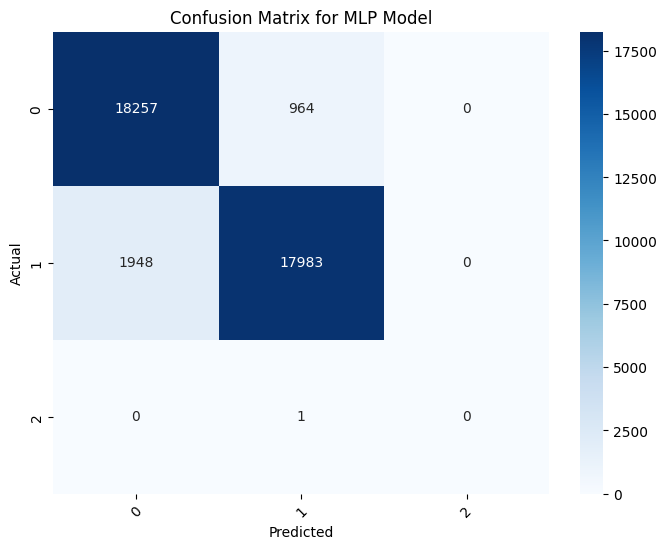

In [40]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Model')
plt.show()

<Axes: >

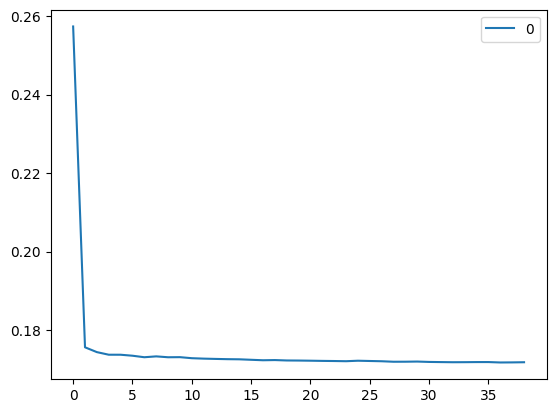

In [41]:
loss_values = clf.loss_curve_

pd.DataFrame(loss_values).plot()

In [26]:
from policy.ENV.env import RLEnv

In [49]:
env=RLEnv(random_flag=True)
sucess=0
for j in range(1):
    trajectory = [] 
    tot_reward = 0
    env.reset()
    
    for i in range(50):
        current = env.get_observation()
        print(current)
        action= clf.predict(np.array(current).reshape(1, -1))
        print('action:',action)
        next, reward, done, info = env.step(action[0])
        tot_reward += reward
        print('ground true:',env.euler)
        print('next:',next)
        print('reward:',reward)
        print('tot_reward:',tot_reward)
        print('done:',done)
        trajectory.append({
            'step': i,
            'state': current.tolist() if isinstance(current, np.ndarray) else current,
            'action': int(action),
            'reward': reward,
            'tot_reward': tot_reward,
            'next_state': next.tolist() if isinstance(next, np.ndarray) else next,
            'done': done,
        })
        if done:
            sucess+=1
            print('sucess:',sucess)
            break
print('sucess:',sucess)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]
action: [0]
ground true: [27.0, 0, -121.5]
next: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0.]
reward: 1
tot_reward: 1
done: 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0.]
action: [0]
ground true: [27.0, 0, -117.0]
next: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0.]
reward: 1
tot_reward: 2
done: 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0.]
action: [0]
ground true: [27.0, 0, -112.5]
next: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0.]
reward: 1
tot_reward: 3
done: 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0.]
action: [0]
ground true: [27.0, 0, -108.0]
next: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.

In [45]:
trajectory

[{'step': 0,
  'state': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0],
  'action': 0,
  'reward': 1,
  'tot_reward': 0,
  'next_state': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0],
  'done': 0},
 {'step': 1,
  'state': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0],
  'action': 0,
  'reward': 1,
  'tot_reward': 0,
  'next_state': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.

In [29]:
import pickle 
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb')) 
# result_score = my_model_clf.score(X_test,y_test) 

In [15]:
# print("Score: ",result_score)

Score:  1.0


In [33]:
y_pred = my_model_clf.predict(X_test)
# print(classification_report(y_test, y_pred, target_names=labellist))
for i in y_pred:
    print(labellist[i])

bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow